In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
import logging

In [2]:
np.set_printoptions(suppress=True)

In [3]:
train=pd.read_csv('/content/drive/MyDrive/train_s3TEQDk.csv')
test=pd.read_csv('/content/drive/MyDrive/test_mSzZ8RL.csv')

In [5]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [7]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [8]:
train.shape , test.shape

((245725, 11), (105312, 10))

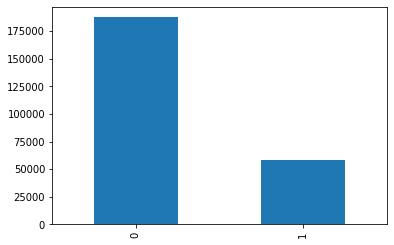

In [9]:
train['Is_Lead'].value_counts().plot(kind='bar')


In [10]:
(train.isnull().sum()/train.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [11]:
train.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [12]:
categorical_columns=['Gender','Age','Region_Code','Occupation','Channel_Code','Vintage','Credit_Product','Is_Active']

continuous_columns=['Avg_Account_Balance']

Target=['Is_Lead']

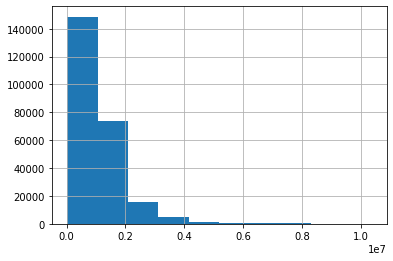

In [13]:
train['Avg_Account_Balance'].hist()

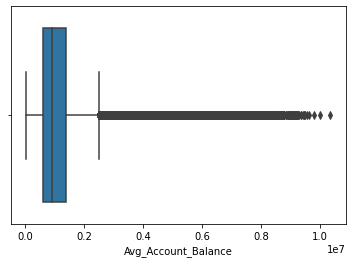

In [14]:
sns.boxplot(x='Avg_Account_Balance',data=train)

In [ ]:
##  2928901.0

In [15]:
train['Avg_Account_Balance'][train['Avg_Account_Balance']>=2928901.0] = 2928901.0

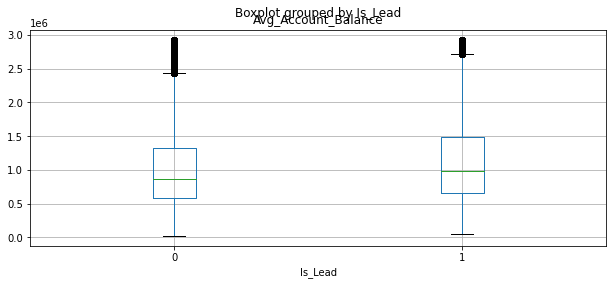

In [16]:
train.boxplot(column='Avg_Account_Balance', by='Is_Lead', figsize=(10,4), vert=True)

In [17]:
train['Avg_Account_Balance'].describe()

count    2.457250e+05
mean     1.081184e+06
std      6.593450e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      2.928901e+06
Name: Avg_Account_Balance, dtype: float64

In [18]:
train['Credit_Product']=train['Credit_Product'].fillna('Yes')
test['Credit_Product']=test['Credit_Product'].fillna('Yes')

In [ ]:
##########################

In [19]:
df=train.append(test)

In [20]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0


In [21]:
train.shape , test.shape

((245725, 11), (105312, 10))

In [22]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['Region_Code']=Le.fit_transform(df['Region_Code'])


In [23]:
Gen_map={'Female':1,'Male':2}
ocup_map={'Other':1,'Salaried':2,'Self_Employed':3,'Entrepreneur':4}
channel_map={'X3':3,'X1':1,'X2':2,'X4':4}
credit_map={'No':1,'Yes':2}
Is_Active_map={'No':1,'Yes':2}


df['Gender']=df['Gender'].map(Gen_map)
df['Occupation']=df['Occupation'].map(ocup_map)
df['Channel_Code']=df['Channel_Code'].map(channel_map)
df['Credit_Product']=df['Credit_Product'].map(credit_map)
df['Is_Active']=df['Is_Active'].map(Is_Active_map)


In [24]:
train_df=df[:245725]
test_df=df[245725:]


In [25]:
train_df=train_df.drop(labels='ID', axis=1)
test_df=test_df.drop(labels='Is_Lead', axis=1)

In [ ]:
####################################################

In [26]:
train_df.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [28]:
predictors=['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active']


target=['Is_Lead']   



X=train_df[predictors].values
y=train_df[target].values


In [29]:
Test_X=test_df[predictors].values

In [30]:

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import f1_score,classification_report,confusion_matrix,roc_auc_score,accuracy_score,auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier 


In [34]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nb=CatBoostClassifier(verbose=False,iterations=125,learning_rate=0.000001,depth=12,custom_metric='AUC',l2_leaf_reg=5.0,
                           bootstrap_type='Bayesian',bagging_temperature=0.5,sampling_frequency='PerTreeLevel',grow_policy='Depthwise',
                           leaf_estimation_method='Gradient',model_shrink_mode='Constant',class_weights=[0.6,5])
    search=nb.fit(X_train,y_train)
    pred_test=search.predict(X_test)
    pred_train=search.predict(X_train)
    ROC_Auc_score_train=roc_auc_score(y_train,pred_train)
    print("The ROC_Auc_score on Train",ROC_Auc_score_train)
    ROC_Auc_score_test=roc_auc_score(y_test,pred_test)
    print("The ROC_Auc_score on Test",ROC_Auc_score_test)
    print("The confusion Matrix",confusion_matrix(y_test,pred_test))
    print('*'*50)
pred_cat=search.predict_proba(Test_X)[:,1] 

The ROC_Auc_score on Train 0.7626911368350808
The ROC_Auc_score on Test 0.7612564763603082
The confusion Matrix [[39804 22675]
 [ 2226 17204]]
**************************************************
The ROC_Auc_score on Train 0.7634577794890929
The ROC_Auc_score on Test 0.760693670174419
The confusion Matrix [[39644 22835]
 [ 2198 17231]]
**************************************************
The ROC_Auc_score on Train 0.7624077773407296
The ROC_Auc_score on Test 0.7616726256925924
The confusion Matrix [[39985 22494]
 [ 2266 17163]]
**************************************************


In [35]:
import pickle

pkl_filename = "cat_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(search, file)